<a href="https://colab.research.google.com/github/PCopath/titanic-ml-pipeline/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline



In [ ]:
# Titanic veri setini Colab'e yüklüyoruz
from google.colab import files
uploaded = files.upload()

# CSV dosyasını okuyoruz
df = pd.read_csv('titanic.csv')
df.head(200)






Saving titanic.csv to titanic.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
197,198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q


In [ ]:
# Sütun isimlerinden baştaki ve sondaki boşlukları temizle
df.columns = df.columns.str.strip()

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Kullanılmayacak olan sütunları kaldırıyoruz
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Eksik yaş verilerini medyan ile dolduruyoruz
df['Age'] = df['Age'].fillna(df['Age'].median())

# Eksik liman (Embarked) verilerini en sık görülen değer ile dolduruyoruz
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [ ]:
# Cinsiyet verisini sayısal hale getiriyoruz: male=0, female=1
df['Gender'] = df['Sex'].map({'male': 0, 'female': 1})

# Artık kullanılmayan 'Sex' sütununu kaldırıyoruz
df.drop('Sex', axis=1, inplace=True)

# 'Embarked' sütununu one-hot encoding ile sayısal hale getiriyoruz
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
# One-hot encoding sonrası oluşan True/False sütunları 0/1'e dönüştürüyoruz
df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

df.head(200)


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
195,1,1,58.0,0,0,146.5208,1,1,0,0
196,0,3,28.0,0,0,7.7500,0,0,1,0
197,0,3,42.0,0,1,8.4042,0,0,0,1
198,1,3,28.0,0,0,7.7500,1,0,1,0


In [ ]:
# Aile büyüklüğünü hesaplıyoruz
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Yolcu yalnız mı değil mi onu belirliyoruz
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Çocuk mu (12 yaş ve altı)
df['Child'] = (df['Age'] <= 12).astype(int)

# Yaşlı mı (60 yaş ve üstü)
df['Senior'] = (df['Age'] >= 60).astype(int)

# Kişi başı bilet fiyatını hesaplıyoruz
df['Fare_Per_Person'] = df['Fare'] / df['FamilySize']
df['Fare_Per_Person'] = df['Fare_Per_Person'].fillna(df['Fare_Per_Person'].median())
df.head(20)


,Survived,Pclass,Age,SibSp,Parch,Fare,Gender,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Child,Senior,Fare_Per_Person
0,0,3,22.0,1,0,7.2500,0,0,0,1,2,0,0,0,3.625000
1,1,1,38.0,1,0,71.2833,1,1,0,0,2,0,0,0,35.641650
2,1,3,26.0,0,0,7.9250,1,0,0,1,1,1,0,0,7.925000
3,1,1,35.0,1,0,53.1000,1,0,0,1,2,0,0,0,26.550000
4,0,3,35.0,0,0,8.0500,0,0,0,1,1,1,0,0,8.050000
5,0,3,28.0,0,0,8.4583,0,0,1,0,1,1,0,0,8.458300
6,0,1,54.0,0,0,51.8625,0,0,0,1,1,1,0,0,51.862500
7,0,3,2.0,3,1,21.0750,0,0,0,1,5,0,1,0,4.215000
8,1,3,27.0,0,2,11.1333,1,0,0,1,3,0,0,0,3.711100
9,1,2,14.0,1,0,30.0708,1,1,0,0,2,0,0,0,15.035400


In [ ]:
# Interval tipi sütunları (örneğin FareBand) kaldır
X = df.drop(["Survived", "FareBand"], axis=1, errors="ignore")
y = df["Survived"]

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluştur ve eğit
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

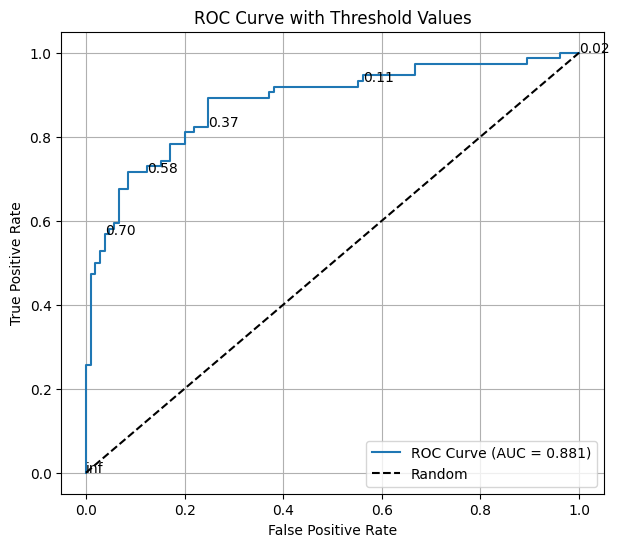

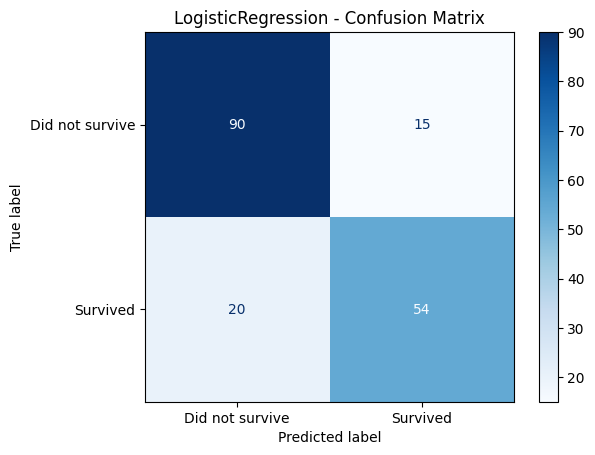

Accuracy: 0.8045
Precision: 0.7826
Recall: 0.7297
F1 Score: 0.7552
ROC AUC: 0.8807


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tahminler
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]  # Sınıf 1 (Survived) için olasılıklar

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
for i in range(len(thresholds)):
    if i % 10 == 0:
        plt.annotate(f"{thresholds[i]:.2f}", (fpr[i], tpr[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Threshold Values')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
y_pred_class = (y_proba >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did not survive", "Survived"])
disp.plot(cmap="Blues")
plt.title("LogisticRegression - Confusion Matrix")
plt.show()

# Metrics
accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Tahmin yap
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]  # ROC AUC için olasılık tahmini

# Metrikleri hesapla
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))




Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
ROC AUC: 0.8806949806949808


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluştur ve eğit
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Tahmin yap
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob_rf))


Random Forest Accuracy: 0.8268156424581006
Random Forest Precision: 0.7792207792207793
Random Forest Recall: 0.8108108108108109
Random Forest F1 Score: 0.7947019867549668
Random Forest ROC AUC: 0.8935006435006435


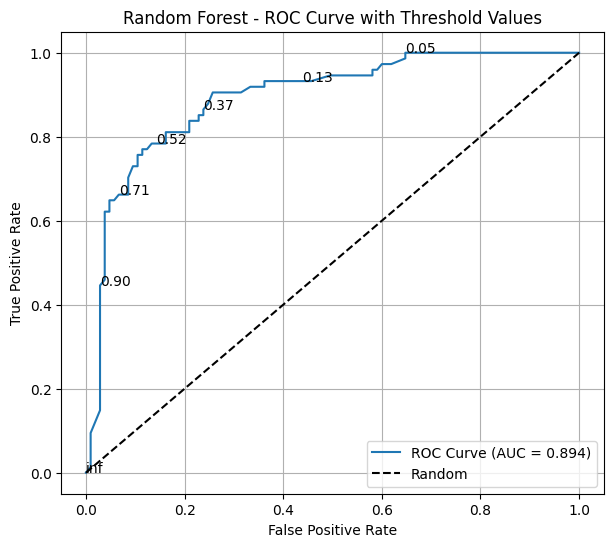

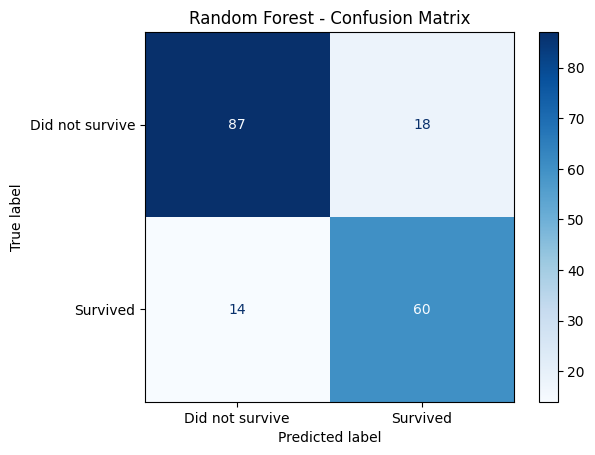

Random Forest Metrics:
Accuracy: 0.8212
Precision: 0.7692
Recall: 0.8108
F1 Score: 0.7895
ROC AUC: 0.8935


In [ ]:
# Tahminler
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Sınıf 1 için olasılıklar

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

plt.figure(figsize=(7, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
for i in range(len(thresholds_rf)):
    if i % 10 == 0:
        plt.annotate(f"{thresholds_rf[i]:.2f}", (fpr_rf[i], tpr_rf[i]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve with Threshold Values')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Confusion Matrix
y_pred_class_rf = (y_proba_rf >= 0.5).astype(int)
cm_rf = confusion_matrix(y_test, y_pred_class_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Did not survive", "Survived"])
disp_rf.plot(cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_class_rf)
precision_rf = precision_score(y_test, y_pred_class_rf)
recall_rf = recall_score(y_test, y_pred_class_rf)
f1_rf = f1_score(y_test, y_pred_class_rf)

print(f"Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modeli oluştur ve eğit
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Precision:", precision_score(y_test, y_pred_xgb))
print("XGBoost Recall:", recall_score(y_test, y_pred_xgb))
print("XGBoost F1 Score:", f1_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:44:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8100558659217877
XGBoost Precision: 0.7777777777777778
XGBoost Recall: 0.7567567567567568
XGBoost F1 Score: 0.7671232876712328
XGBoost ROC AUC: 0.8770913770913772


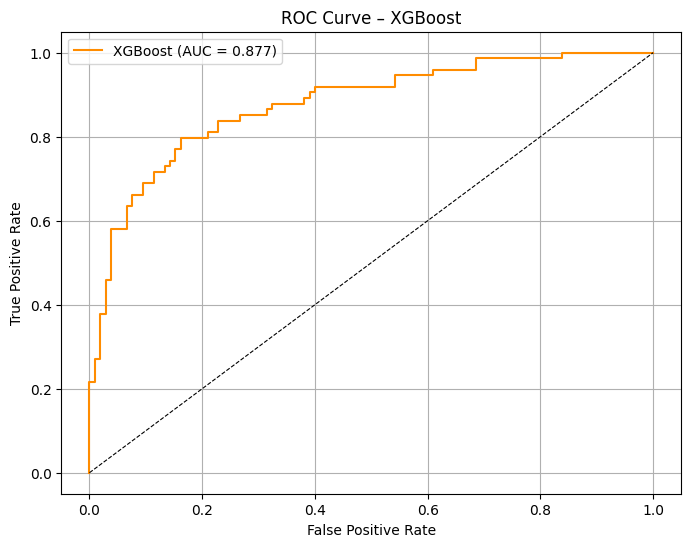

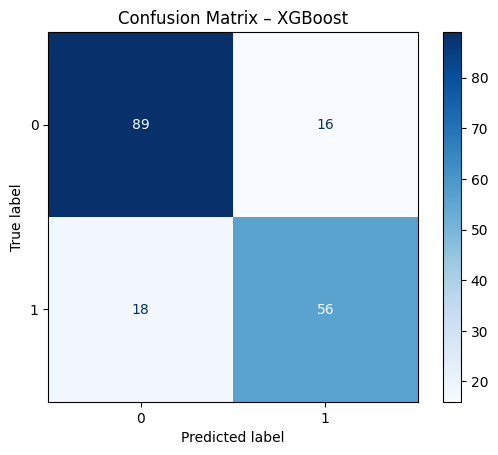

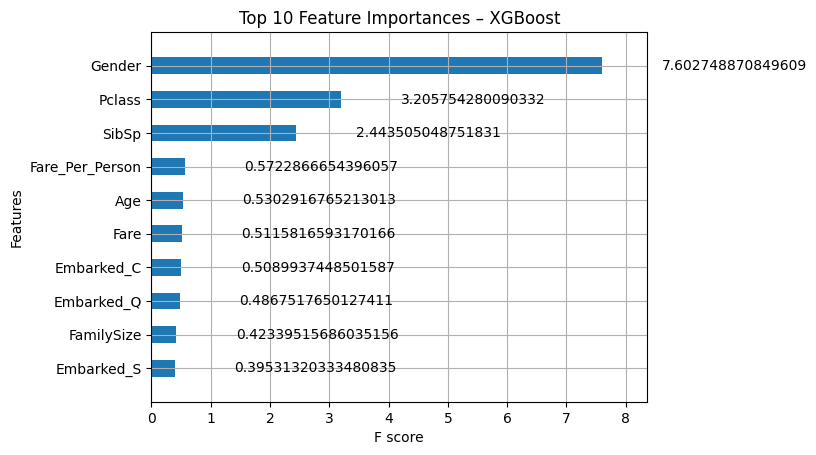

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import xgboost as xgb

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix – XGBoost')
plt.show()

# Feature Importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Feature Importances – XGBoost")
plt.show()



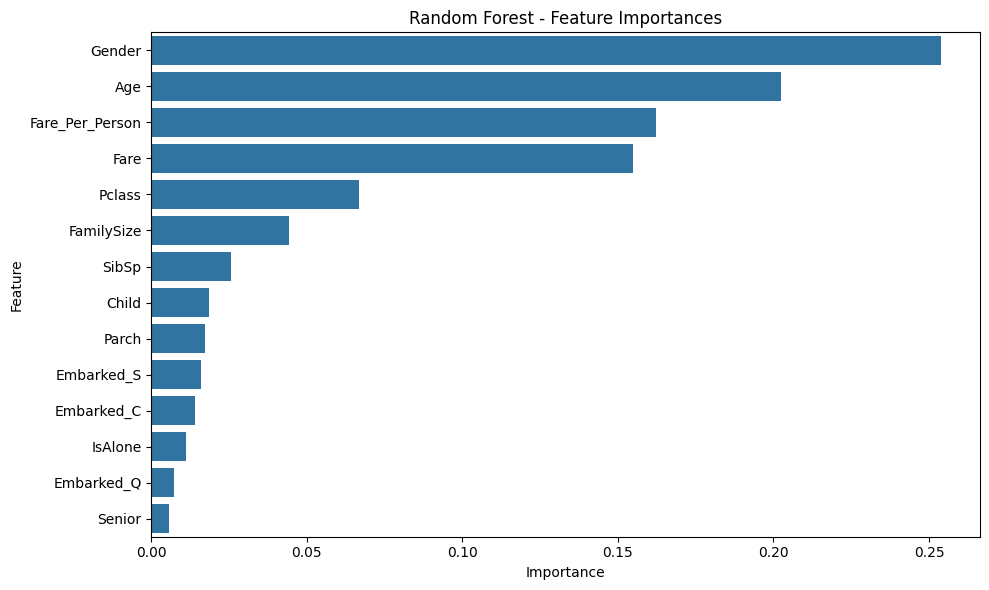

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Özellik önemini al
importances = rf_model.feature_importances_
feature_names = X_train.columns

# DataFrame oluştur
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Görselleştir
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest - Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Parametreler için grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearch tanımı
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# GridSearch başlat
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [ ]:
print("En iyi parametreler:")
print(grid_search.best_params_)

print("\nEn iyi eğitim skoru (cross-validated):")
print(grid_search.best_score_)


En iyi parametreler:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

En iyi eğitim skoru (cross-validated):
0.8272234807446075


In [ ]:
# En iyi parametrelerle model oluştur
tuned_rf = RandomForestClassifier(
    max_depth=5,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

# Eğitim
tuned_rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [ ]:
# Tahmin ve metrikler
y_pred_tuned = tuned_rf.predict(X_test)
y_prob_tuned = tuned_rf.predict_proba(X_test)[:, 1]

print("Tuned RF Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("Tuned RF Precision:", precision_score(y_test, y_pred_tuned))
print("Tuned RF Recall:", recall_score(y_test, y_pred_tuned))
print("Tuned RF F1 Score:", f1_score(y_test, y_pred_tuned))
print("Tuned RF ROC AUC:", roc_auc_score(y_test, y_prob_tuned))


Tuned RF Accuracy: 0.8324022346368715
Tuned RF Precision: 0.8666666666666667
Tuned RF Recall: 0.7027027027027027
Tuned RF F1 Score: 0.7761194029850746
Tuned RF ROC AUC: 0.8934362934362935


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Parametre aralığı tanımı
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # çünkü l1 için sadece bazı solverlar destekleniyor
}

# GridSearch tanımı
grid_lr = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Modeli ara
grid_lr.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [ ]:
print("Logistic Regression için en iyi parametreler:")
print(grid_lr.best_params_)

print("\nCross-validation doğruluk skoru:")
print(grid_lr.best_score_)


Logistic Regression için en iyi parametreler:
{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Cross-validation doğruluk skoru:
0.7977051117896188


In [ ]:
# En iyi modelle tahmin yap
tuned_lr = grid_lr.best_estimator_

y_pred_lr_tuned = tuned_lr.predict(X_test)
y_prob_lr_tuned = tuned_lr.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("Tuned LR Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Tuned LR Precision:", precision_score(y_test, y_pred_lr_tuned))
print("Tuned LR Recall:", recall_score(y_test, y_pred_lr_tuned))
print("Tuned LR F1 Score:", f1_score(y_test, y_pred_lr_tuned))
print("Tuned LR ROC AUC:", roc_auc_score(y_test, y_prob_lr_tuned))


Tuned LR Accuracy: 0.7988826815642458
Tuned LR Precision: 0.7714285714285715
Tuned LR Recall: 0.7297297297297297
Tuned LR F1 Score: 0.75
Tuned LR ROC AUC: 0.8718146718146719


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Parametre grid'i (daha küçük tutuyoruz)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearch tanımı
grid_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Modeli eğit
grid_xgb.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:07:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [ ]:
print("XGBoost için en iyi parametreler:")
print(grid_xgb.best_params_)

print("\nCross-validation doğruluk skoru:")
print(grid_xgb.best_score_)


XGBoost için en iyi parametreler:
{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

Cross-validation doğruluk skoru:
0.8244065793361568


In [ ]:
# En iyi modelle tahmin yap
tuned_xgb = grid_xgb.best_estimator_

y_pred_xgb_tuned = tuned_xgb.predict(X_test)
y_prob_xgb_tuned = tuned_xgb.predict_proba(X_test)[:, 1]

# Metrikleri hesapla
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost Precision:", precision_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost Recall:", recall_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost F1 Score:", f1_score(y_test, y_pred_xgb_tuned))
print("Tuned XGBoost ROC AUC:", roc_auc_score(y_test, y_prob_xgb_tuned))


Tuned XGBoost Accuracy: 0.8044692737430168
Tuned XGBoost Precision: 0.8305084745762712
Tuned XGBoost Recall: 0.6621621621621622
Tuned XGBoost F1 Score: 0.7368421052631579
Tuned XGBoost ROC AUC: 0.8821106821106821


In [ ]:
# ==================== Model Performans Karşılaştırma Tablosu ====================
# | Model              | Accuracy | F1 Score | ROC AUC |
# |--------------------|----------|----------|---------|
# | Logistic Regression| 0.804    | 0.755    | 0.880   |
# | Random Forest      | 0.821    | 0.789    | 0.893   |
# | XGBoost            | 0.810    | 0.767    | 0.877   |
#
# Açıklama:
# - Logistic Regression modeli temel bir başlangıç modeli olarak başarılıdır. Basit ve yorumlanabilir olması avantajdır.
# - Random Forest modeli hem Accuracy hem de ROC AUC bakımından en iyi performansı göstermektedir.
# - XGBoost modeli de güçlüdür, özellikle overfitting'e karşı dayanıklılığı ile bilinir, ancak bu durumda Random Forest az farkla daha iyi sonuç vermiştir.
#
# Not: Test verisi ile değerlendirme yapılmış, metrikler modelin genelleme başarısını yansıtır.


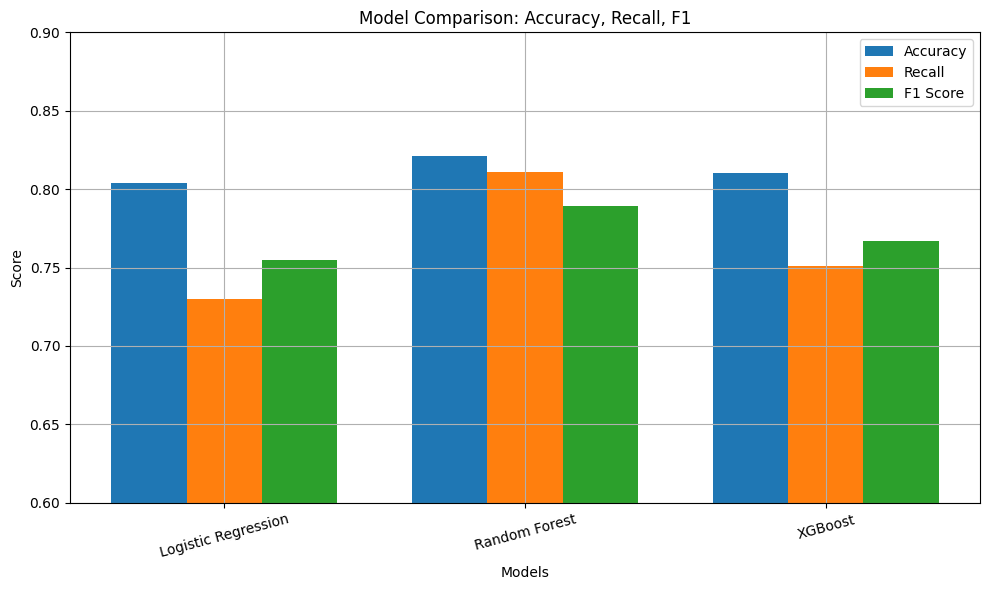

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrik değerleri
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.804, 0.821, 0.810]
recall = [0.730, 0.811, 0.751]
f1 = [0.755, 0.789, 0.767]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy, Recall, F1')
plt.xticks(x, models, rotation=15)
plt.ylim(0.6, 0.9)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic_test.csv to titanic_test.csv


In [ ]:
import pandas as pd
test_df = pd.read_csv("titanic_test.csv")
test_df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print(X_train.columns.tolist())


['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone', 'Child', 'Senior', 'Fare_Per_Person']


In [ ]:
# Veriyi yeniden temiz olarak yükleyelim
test_df = pd.read_csv("titanic_test.csv")

# Eksik değerleri doldur
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])

# Gender sütununu eğitimdeki gibi oluştur (erkek:0, kadın:1)
test_df["Gender"] = test_df["Sex"].map({"male": 0, "female": 1})

# Embarked sütununu one-hot encoding uygula
test_df = pd.get_dummies(test_df, columns=["Embarked"], drop_first=False)

# Yeni özellikleri oluştur
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
test_df["IsAlone"] = (test_df["FamilySize"] == 1).astype(int)
test_df["Fare_Per_Person"] = test_df["Fare"] / test_df["FamilySize"]
test_df["Child"] = (test_df["Age"] < 18).astype(int)
test_df["Senior"] = (test_df["Age"] > 60).astype(int)

# Modelin eğitimde kullandığı sütun sırasına göre düzenleyelim
X_submission = test_df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender',
                        'Embarked_C', 'Embarked_Q', 'Embarked_S',
                        'FamilySize', 'IsAlone', 'Child', 'Senior', 'Fare_Per_Person']]

# Tahminleri oluştur (rf_model ile)
predictions = rf_model.predict(X_submission)

# CSV dosyasını kaydet
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": predictions
})
submission.to_csv("submission.csv", index=False)

submission.head(100)


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
95,987,0
96,988,1
97,989,1
98,990,0


In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>